In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from mordred import Calculator, descriptors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

C:\Users\noton\miniconda3\envs\ReL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("result/smiles_list_2400.csv")
made_by = pd.DataFrame(data['made_by'], columns=['made_by'])
data

,SMILES,made_by
0,CN(C)c1ccc(-c2cc(-c3c4[nH]cnc4cc4nc[nH]c34)c3c...,e=0.1_1/T
1,CN(C)c1ccc(-c2cc(N(C)Cc3ccc4c(c3)C(=O)C=CC4=O)...,e=0.1_1/T
2,Cn1cnc2ccc(-c3ccc4c(c3)S(=O)(=O)c3cc(-c5c6[nH]...,e=0.1_1/T
3,CN(C)c1ccc(-c2cc(-c3cc4ccccc4c4ccccc34)c3cccc4...,e=0.1_1/T
4,CN(C)c1ccc(-c2cc3c(cc2-c2ccc4c(c2)S(=O)(=O)c2c...,e=0.1_1/T
...,...,...
4795,CN(C)c1ccc(-c2c(-c3cc(N(C)C)ccc3-n3c4ccc(F)cc4...,e=0.1_T
4796,CN(C)c1ccc(-c2cc(N(C)C)ccc2-c2ccc3c(c2)oc2cccc...,e=0.1_T
4797,C#Cc1nc2cc3nc[nH]c3c(-c3ccc4c(c3)S(=O)(=O)c3cc...,e=0.1_T
4798,CN(C)c1ccc2c(c1)-c1ccccc1S2(=O)=O,e=0.1_T


In [3]:
mf_2 = []
for i in range(0, len(data)):
    mol_2 = Chem.MolFromSmiles(data["SMILES"][i])
    fp_2 = AllChem.GetMorganFingerprintAsBitVect(mol_2, 2, 2048)
    mf_2.append(np.array(fp_2, int))

df = pd.DataFrame(mf_2)
df = df.add_prefix('MF2_')
print(df.shape)
df

(4800, 2048)


,MF2_0,MF2_1,MF2_2,MF2_3,MF2_4,MF2_5,MF2_6,MF2_7,MF2_8,MF2_9,...,MF2_2038,MF2_2039,MF2_2040,MF2_2041,MF2_2042,MF2_2043,MF2_2044,MF2_2045,MF2_2046,MF2_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# UMAP
X = np.array(df)
reducer = umap.UMAP(random_state=42)
X_2d = reducer.fit_transform(X)
df_umap = pd.DataFrame(X_2d)
df_umap = df_umap.add_prefix('UMAP_')
df_umap

C:\Users\noton\miniconda3\envs\ReL\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,UMAP_0,UMAP_1
0,6.254058,12.694772
1,-0.484302,8.154800
2,13.119142,2.807171
3,1.299086,8.898189
4,1.808691,1.291902
...,...,...
4795,1.766094,6.950000
4796,0.043397,5.390178
4797,12.285878,3.772762
4798,1.874541,-0.503684


In [5]:
df_umap = pd.concat([df_umap, made_by], axis=1, join='inner')
df_umap.head()

,UMAP_0,UMAP_1,made_by
0,6.254058,12.694772,e=0.1_1/T
1,-0.484302,8.154800,e=0.1_1/T
2,13.119142,2.807171,e=0.1_1/T
3,1.299086,8.898189,e=0.1_1/T
4,1.808691,1.291902,e=0.1_1/T


In [6]:
MF_umap_e01 = df_umap[df_umap['made_by'] == 'e=0.1_1/T']
MF_umap_e01_2 = df_umap[df_umap['made_by'] == 'e=0.1_T']

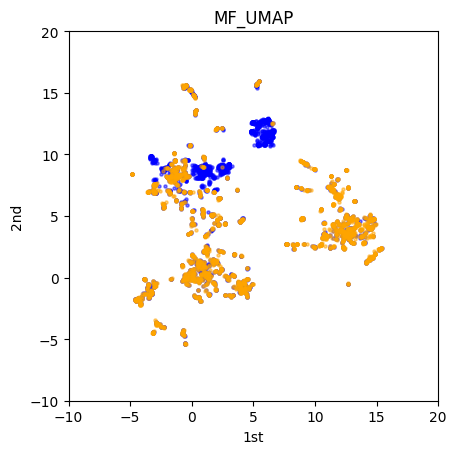

In [7]:
fig = plt.figure()
plt.scatter(MF_umap_e01['UMAP_0'], MF_umap_e01['UMAP_1'], color='blue', label='e=0.1_1/T', s=5, alpha=0.5)
plt.scatter(MF_umap_e01_2['UMAP_0'], MF_umap_e01_2['UMAP_1'], color='orange', label='e=0.1_T', s=5, alpha=0.5)
plt.title("MF_UMAP")
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-10, 20)
plt.ylim(-10, 20)
plt.gca().set_aspect('equal')
plt.show()

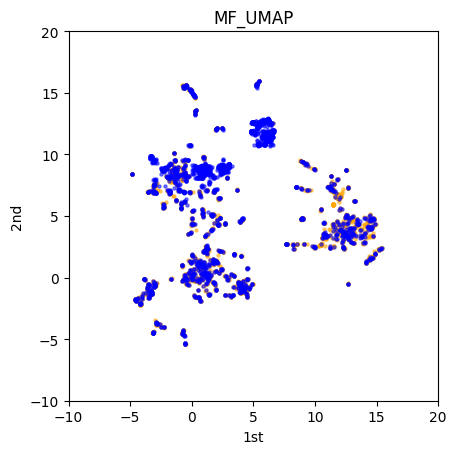

In [8]:
fig = plt.figure()
plt.scatter(MF_umap_e01_2['UMAP_0'], MF_umap_e01_2['UMAP_1'], color='orange', label='e=0.1_T', s=5, alpha=0.5)
plt.scatter(MF_umap_e01['UMAP_0'], MF_umap_e01['UMAP_1'], color='blue', label='e=0.1_1/T', s=5, alpha=0.5)
plt.title("MF_UMAP")
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-10, 20)
plt.ylim(-10, 20)
plt.gca().set_aspect('equal')
plt.show()

In [9]:
# TSNE
X = np.array(df)
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)
df_tsne = pd.DataFrame(X_2d)
df_tsne = df_tsne.add_prefix('TSNE_')
df_tsne

,TSNE_0,TSNE_1
0,20.315090,80.968964
1,-44.669415,-1.039108
2,35.223488,-25.047905
3,-28.978514,48.933197
4,-29.309650,-44.909416
...,...,...
4795,-30.915264,28.251766
4796,-20.314613,1.307116
4797,62.820946,-7.451719
4798,-16.459833,-52.647472


In [10]:
df_tsne = pd.concat([df_tsne, made_by], axis=1, join='inner')
df_tsne.head()

,TSNE_0,TSNE_1,made_by
0,20.315090,80.968964,e=0.1_1/T
1,-44.669415,-1.039108,e=0.1_1/T
2,35.223488,-25.047905,e=0.1_1/T
3,-28.978514,48.933197,e=0.1_1/T
4,-29.309650,-44.909416,e=0.1_1/T


In [11]:
MF_tsne_e01 = df_tsne[df_tsne['made_by'] == 'e=0.1_1/T']
MF_tsne_e01_2 = df_tsne[df_tsne['made_by'] == 'e=0.1_T']

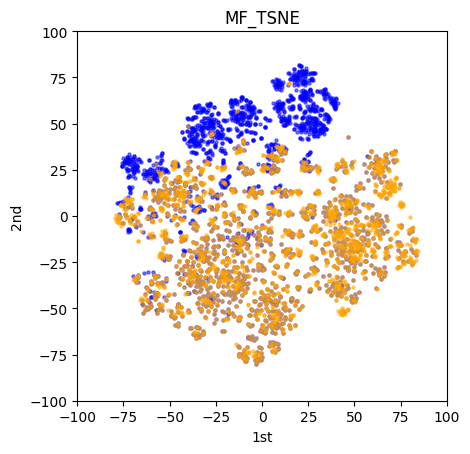

In [12]:
fig = plt.figure()
plt.scatter(MF_tsne_e01['TSNE_0'], MF_tsne_e01['TSNE_1'], color='blue', label='e=0.1_1/T', s=5, alpha=0.5)
plt.scatter(MF_tsne_e01_2['TSNE_0'], MF_tsne_e01_2['TSNE_1'], color='orange', label='e=0.1_T', s=5, alpha=0.5)
plt.title("MF_TSNE")
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.gca().set_aspect('equal')
plt.show()

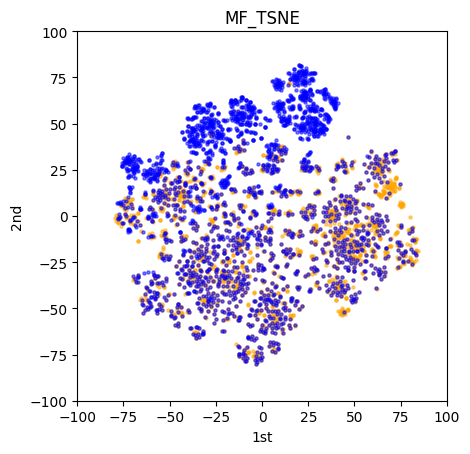

In [13]:
fig = plt.figure()
plt.scatter(MF_tsne_e01_2['TSNE_0'], MF_tsne_e01_2['TSNE_1'], color='orange', label='e=0.1_T', s=5, alpha=0.5)
plt.scatter(MF_tsne_e01['TSNE_0'], MF_tsne_e01['TSNE_1'], color='blue', label='e=0.1_1/T', s=5, alpha=0.5)
plt.title("MF_TSNE")
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.gca().set_aspect('equal')
plt.show()